In [33]:
import pandas as pd

data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0410/0506/train/binary train_data_after_vector(0506).csv",index_col=0)

data_row

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,predict
28636,0.057666,-0.048499,-0.015004,-0.008556,0.007480,0.004326,-0.044761,0.025557,0.058081,0.001161,...,-0.042090,-0.001205,-0.006470,-0.052170,-0.051578,0.010536,0.033110,0.026323,-0.023366,0
5242,0.084339,-0.016759,-0.002239,0.006603,0.034535,-0.000100,-0.025028,0.011796,0.037490,0.035441,...,-0.049235,-0.034401,-0.019802,-0.064542,-0.005789,0.011845,0.017500,0.008930,-0.024240,1
9597,0.048915,-0.082816,-0.022027,-0.036624,-0.009340,0.005210,0.010473,-0.008542,0.076122,-0.014251,...,-0.047595,-0.029653,0.028283,-0.031656,-0.046234,0.021212,0.019049,0.003998,-0.011915,0
7582,0.044780,-0.074579,-0.025775,-0.022203,-0.012583,-0.003432,0.012088,-0.006128,0.052249,-0.011539,...,-0.039720,-0.020792,0.019995,-0.030663,-0.046267,0.017612,0.020224,0.004303,-0.022597,0
4625,0.046568,-0.084928,-0.012517,-0.023174,0.001471,-0.001228,-0.020728,0.006802,0.053653,-0.001821,...,-0.043898,-0.015343,0.008613,-0.034361,-0.034957,0.008622,0.016759,0.001847,-0.016970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5680,0.012926,-0.054298,-0.018591,0.020354,0.024776,-0.015096,-0.047258,0.038192,0.053365,0.003048,...,-0.023678,0.017794,-0.031177,-0.039030,-0.067405,0.022877,0.015605,0.020549,-0.031647,0
22362,0.083671,-0.068238,-0.024110,-0.003436,0.063956,0.005678,-0.046681,0.034365,0.021408,-0.003563,...,-0.007964,-0.065795,0.014500,-0.018180,0.047096,-0.031353,0.023866,0.004741,-0.000127,1
26489,0.112500,-0.015669,-0.019522,0.001867,0.014560,0.009811,-0.032503,0.053587,0.075874,-0.005853,...,-0.024218,-0.025601,0.049616,-0.031445,-0.001811,-0.016349,0.031340,0.016100,0.000723,1
21277,0.063781,-0.045069,-0.021233,0.004045,0.035538,0.013520,-0.060870,0.017398,0.066957,-0.018462,...,-0.029354,0.011228,-0.001308,-0.058188,-0.068160,0.005134,0.026979,0.031734,-0.012957,0


In [34]:

import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")
device = torch.device("mps")  # MPS 장치 사용

tensor([1.], device='mps:0')


In [35]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [36]:
# 데이터 불러오기 및 전처리
data_row=pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0410/0506/train/binary train_data_after_vector(0506).csv",index_col=0)
y_train = pd.get_dummies(data_row['predict']).values
X_train = data_row.drop(columns=['predict']).values

test = pd.read_csv("/Users/withmocha/Desktop/DATA/Capston Design(2024)/data(sentence)/0410/0506/test/binary target_data(0506).csv", index_col=0)
test_y = pd.get_dummies(test['predict']).values
test_x = test.drop(columns=['predict']).values

In [37]:

X_train = torch.tensor(X_train, dtype=torch.float).unsqueeze(1).to(device)
y_train = torch.tensor(y_train, dtype=torch.float).to(device)
test_x = torch.tensor(test_x, dtype=torch.float).unsqueeze(1).to(device)
test_y = torch.tensor(test_y, dtype=torch.float).to(device)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(test_x.shape)
print(test_y.shape)

torch.Size([28842, 1, 768])
torch.Size([28842, 2])
torch.Size([300, 1, 768])
torch.Size([300, 2])


In [39]:

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=40, shuffle=True)

test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, shuffle=False)

In [44]:
class TextClassifier(nn.Module):
    def __init__(self):
        super(TextClassifier, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=X_train.shape[2], out_channels=128, kernel_size=1)  
        self.conv2 = nn.Conv1d(in_channels=128, out_channels=64, kernel_size=1)
        self.conv3 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=1)
        self.pool = nn.MaxPool1d(kernel_size=1)
        self.dropout = nn.Dropout(0.5)
        self.lstm = nn.LSTM(input_size=32, hidden_size=128, num_layers=2, batch_first=True, bidirectional=True)
        self.fc1 = nn.Linear(128*2, 32)
        self.fc2 = nn.Linear(32, 2)
        self.activation = nn.ELU()

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.activation(self.conv2(x))
        x = self.activation(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)
        x = x.permute(0, 2, 1)  
        x, _ = self.lstm(x)
        x = self.dropout(x[:, -1, :])  
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = TextClassifier().to(device)
model.to(device)

TextClassifier(
  (conv1): Conv1d(768, 128, kernel_size=(1,), stride=(1,))
  (conv2): Conv1d(128, 64, kernel_size=(1,), stride=(1,))
  (conv3): Conv1d(64, 32, kernel_size=(1,), stride=(1,))
  (pool): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(32, 128, num_layers=2, batch_first=True, bidirectional=True)
  (fc1): Linear(in_features=256, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
  (activation): ELU(alpha=1.0)
)

In [45]:
from torch.optim.lr_scheduler import StepLR


criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.003,weight_decay=1e-5)
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

In [46]:
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from keras_radam import RAdam

In [47]:
num_epochs = 50
training_losses = []
validation_losses = []


patience = 20  
counter = 0  
best_loss = None  

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # 데이터를 MPS 장치로 이동
        inputs = inputs.permute(0, 2, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.float())
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    
   
    model.eval()
    validation_loss = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device) 
            inputs = inputs.permute(0, 2, 1)  
            outputs = model(inputs)
            loss = criterion(outputs, labels.float())
            validation_loss += loss.item()
    
    avg_validation_loss = validation_loss / len(test_loader)
    validation_losses.append(avg_validation_loss)

    print(f'Epoch {epoch+1}, Training Loss: {avg_train_loss}, Validation Loss: {avg_validation_loss}')
    
    scheduler.step()
    
    if best_loss is None:
        best_loss = avg_validation_loss
    elif avg_validation_loss < best_loss:
        best_loss = avg_validation_loss
        counter = 0  
    else:
        counter += 1  
        if counter >= patience:  
            print("Early stopping!")
            break

print('Test Fine End')



Epoch 1, Training Loss: 0.07238586728377726, Validation Loss: 0.06679988926577607
Epoch 2, Training Loss: 0.03966535315945228, Validation Loss: 0.016093626082848308
Epoch 3, Training Loss: 0.033840760181776806, Validation Loss: 0.013231250721682955
Epoch 4, Training Loss: 0.04356909601255742, Validation Loss: 0.05610236430115037
Epoch 5, Training Loss: 0.03415274625859787, Validation Loss: 0.01810456433113359
Epoch 6, Training Loss: 0.02768516282100345, Validation Loss: 0.014139783993009018
Epoch 7, Training Loss: 0.026504618329760494, Validation Loss: 0.013773924067671335
Epoch 8, Training Loss: 0.025112095154686747, Validation Loss: 0.012515830602995284
Epoch 9, Training Loss: 0.029421789144598583, Validation Loss: 0.014669594066857172
Epoch 10, Training Loss: 0.025827698322207274, Validation Loss: 0.010416107788274948
Epoch 11, Training Loss: 0.024531242489050923, Validation Loss: 0.01121848793754566
Epoch 12, Training Loss: 0.024824615470508404, Validation Loss: 0.01487422959858975

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np



torch.save(model.state_dict(), 'pytorch cnn-bilstm model_state_dict0424.pt')

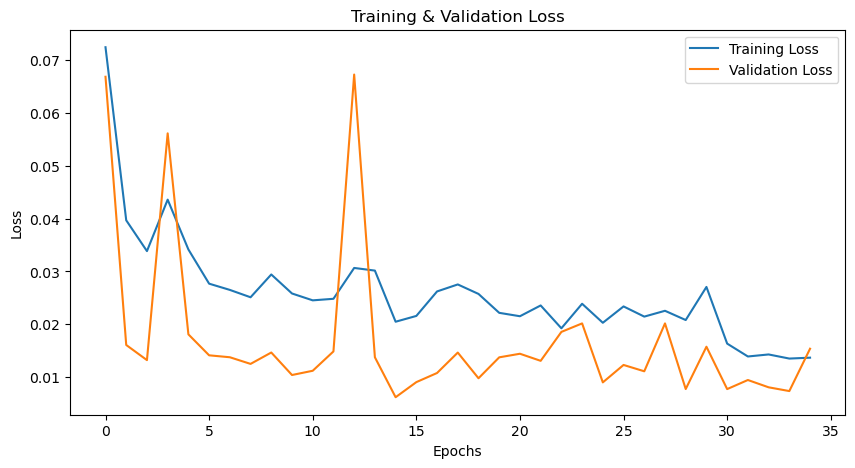

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

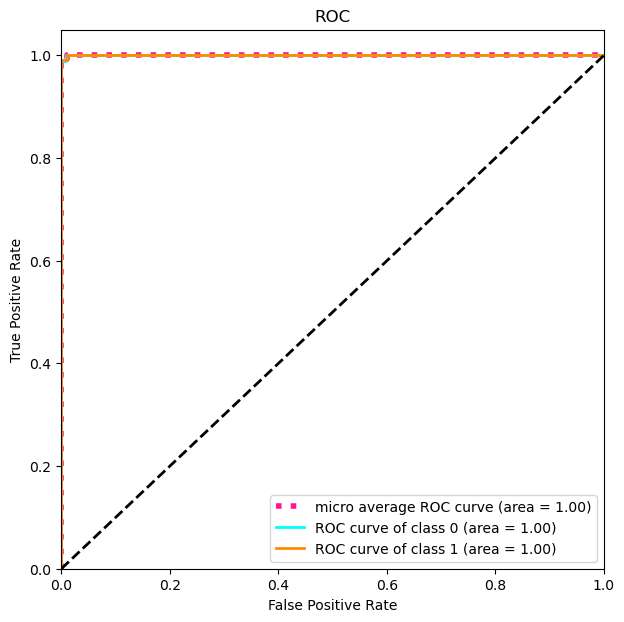

In [50]:

def plot_multiclass_roc_curve(test_y, y_score, n_classes):
   
    test_y_bin = label_binarize(test_y, classes=[*range(n_classes)])

    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

   
    fpr["micro"], tpr["micro"], _ = roc_curve(test_y_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

   
    plt.figure(figsize=(7, 7))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()





from sklearn.preprocessing import label_binarize

test_x = test_x.permute(0, 2, 1)  
y_score = model(test_x).detach().cpu().numpy()

test_y = test_y.detach().cpu().numpy()

plot_multiclass_roc_curve(test_y, y_score, n_classes=2)

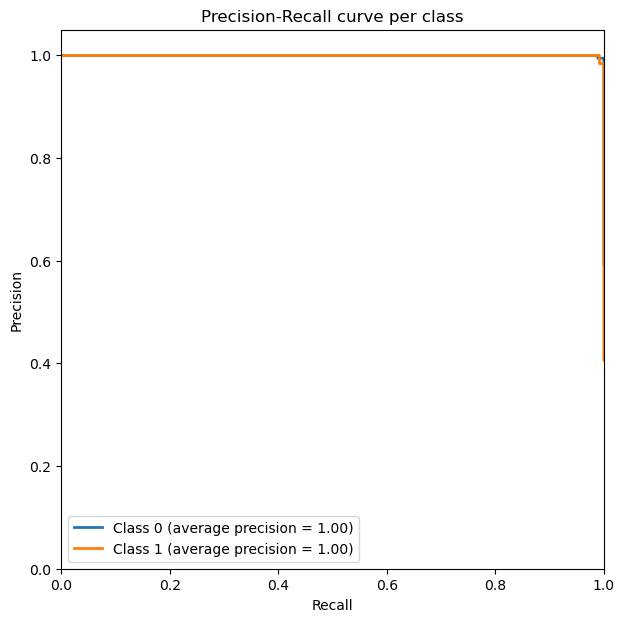

In [51]:
def plot_precision_recall_curve(test_y, y_score, n_classes):
    
    test_y = label_binarize(test_y, classes=[*range(n_classes)])
    
   
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(test_y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(test_y[:, i], y_score[:, i])

    
    plt.figure(figsize=(7, 7))
    for i in range(n_classes):
        plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (average precision = {average_precision[i]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve per class')
    plt.legend(loc="best")
    plt.show()
    
plot_precision_recall_curve(test_y, y_score, n_classes=2)

In [52]:

y_pred = np.argmax(y_score, axis=1)
test_y_labels = np.argmax(test_y, axis=1)  # 실제 레이블

In [53]:

accuracy = accuracy_score(test_y_labels, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9933333333333333


In [54]:
# 혼동 행렬
conf_matrix = confusion_matrix(test_y_labels, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[177   1]
 [  1 121]]


In [55]:
with open("CNN BILSTM confusion matrix.txt", "w") as text_file:
    print(confusion_matrix(test_y_labels, y_pred), file=text_file)

In [56]:
# 분류 보고서
class_report = classification_report(test_y_labels, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.99      0.99      0.99       122

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [57]:
with open("CNN-BILSTM output.txt", "w") as text_file:
    print(classification_report(test_y_labels, y_pred,digits=4), file=text_file)